<a href="https://colab.research.google.com/github/YangJeongA/EnglishPhonetics-2022Fall/blob/main/221125_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering: 1차원 상에 분포해있는 데이터들 중 비슷한 위치에 분포해있는 것들을 clustering (grouping)하는 것을 해주는 model

-> 즉, regression이나 classificaiton처럼 입출력값이 pairing되어 있는 것이 아니라 (labeling되어있지 않음), 그냥 데이터 하나만 있을 때 이것을 어떻게 clustering(grouping)해줄 것인지에 대한 얘기

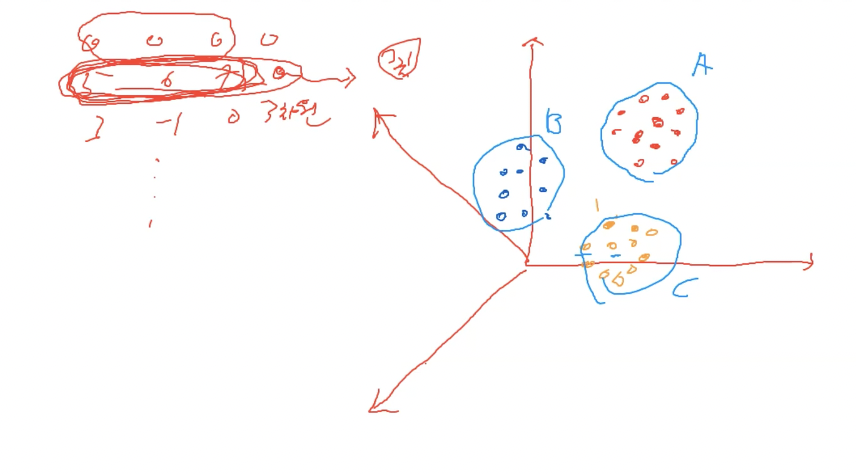

-> 이런식으로 비슷한 위치에 있는 데이터끼리 묶어줌 (A/B/C)

-> 모든 데이터는 벡터로 나타낼 수 있고, 벡터화 되고 나면 위와 같은 분석이 가능해짐.(하나의 정보는 늘 하나의 점으로 나타나지기 때문에). 서로 다른 정보는 서로 다른 곳에서 하나로 묶어질 수 밖에 없음. 이런 데이터 구조화를 생각할 줄 알아야 함 

## Loading a dataset

In [ ]:
import pandas as pd
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'])
iris

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = iris.drop(['label'], axis=1)
X

# 위 정보에서 label을 없앤 것 
# clustering은 아래와 같은 dataset (labeling 되지 않은 하나의 데이터)에 적용되는 것

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


위와 같은 dataset은 여러개의 4차원 벡터로 구성되어 있는 것! 이제 이런식으로 표현할 줄 알아야 함

## Comparing Algorithms

clusering model 2가지: K-Means, GMM

### K-Means

: KMeans에서 K가 '몇개의'라는 뜻. 즉, n개의 mean을 가정하라는 뜻 

-> 이 n개의 mean을 점으로 찍어놓은 후, 데이터가 어디에 가장 잘 맞는지 계속해서 찾아나가는 것이 바로 K-Means

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)    #n_cluster: 몇개를 기준으로 clustering할 것인지를 정해주는 것
model.fit_predict(X)



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

출력값 보면 비슷한 값끼리 3그룹으로 나눠져 있는 것을 볼 수 있음 

###Gaussian Mixture Model(GMM)

: k-means와 비슷하게, Gaussian 분포를 만들어놓고 데이터들을 조금씩 옮기면서 가장 잘 fit되게 grouping함

In [ ]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3)   #n_components: 몇개를 기준으로 clustering할 것인지를 정해주는 것
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])